In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
%matplotlib inline
import numpy as np
import librosa
import librosa.display as lplt
import IPython.display as ipd
import seaborn as sns

In [6]:
DATA_AUDIO_PATH = '../Data/genres_original/'
DATA_VIDEO_PATH = '../Data/images_original/'

In [7]:
#audio features of a rock song extracted through librosa

audio_data , sr = librosa.load(f'{DATA_AUDIO_PATH}/rock/rock.00000.wav')

print(f'Pitch Vector: {audio_data}')
print(f'Sample Frequency or Sample Rate(KHz): {sr}')
print(f'Pitch Vector Size: {np.size(audio_data)}')

Pitch Vector: [-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ]
Sample Frequency or Sample Rate(KHz): 22050
Pitch Vector Size: 661794


In [8]:
ipd.Audio(audio_data, rate=sr)

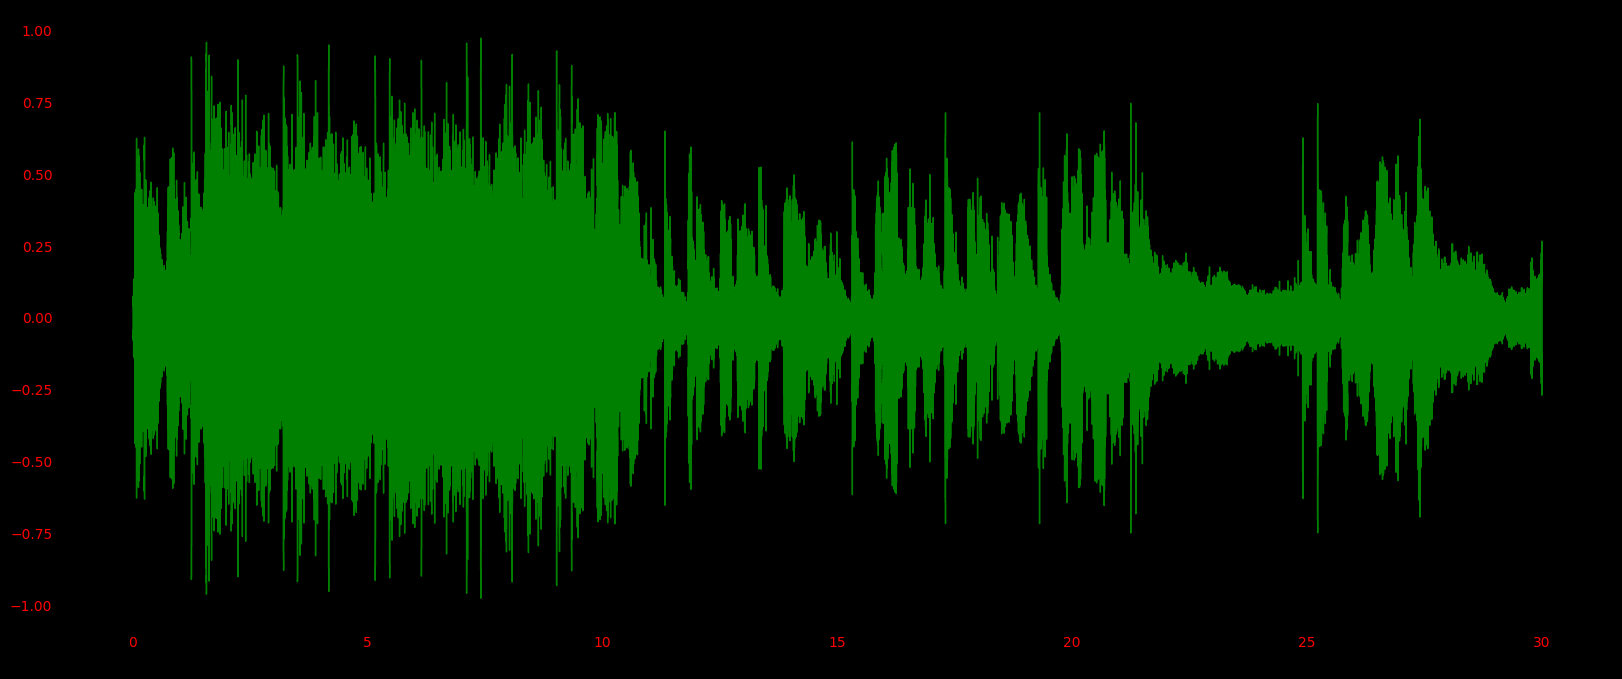

In [9]:
plt.rc_context({'axes.edgecolor':'orange'})
fig = plt.figure(figsize=(20,8))
fig.set_facecolor('black')
ax = plt.axes()
ax.set_facecolor('black')
[t.set_color('red') for t in ax.xaxis.get_ticklines()]
[t.set_color('red') for t in ax.yaxis.get_ticklines()]
[t.set_color('red') for t in ax.xaxis.get_ticklabels()]
[t.set_color('red') for t in ax.yaxis.get_ticklabels()]
librosa.display.waveshow(y=audio_data,sr=sr,color="g")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14468\2450136972.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  stft_db = librosa.amplitude_to_db(stft, ref=np.max)
C:\Users\USER\AppData\Local\Temp\ipykernel_14468\2450136972.py:9: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


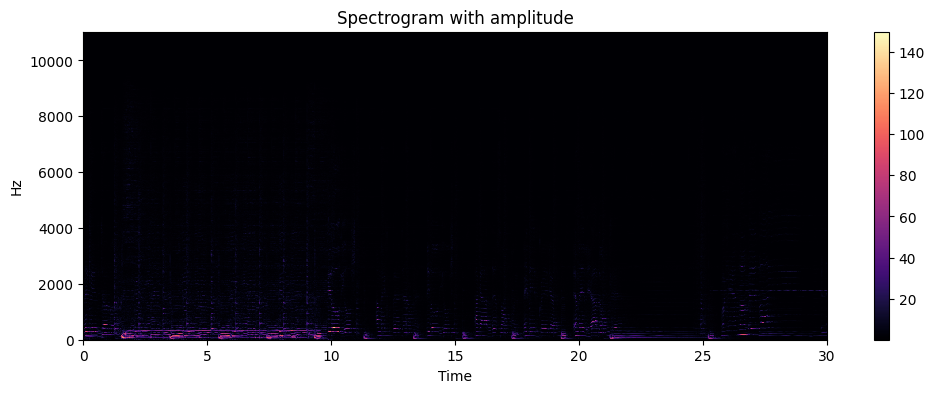

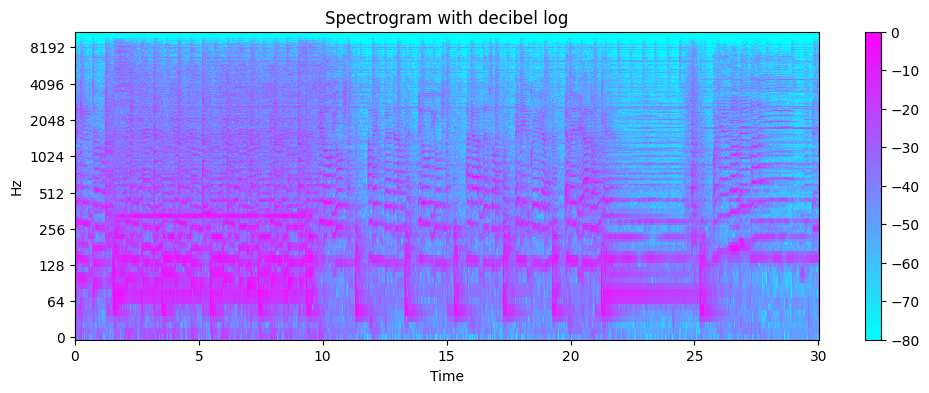

In [10]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()


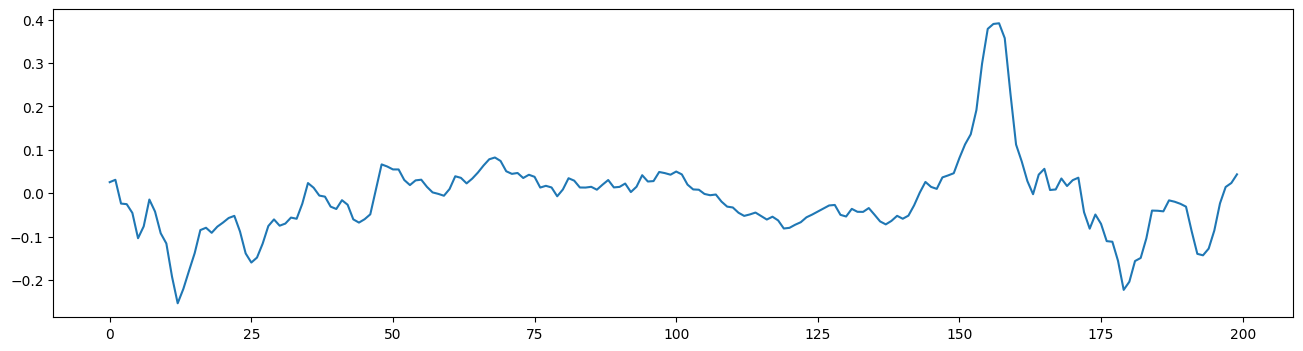

In [11]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

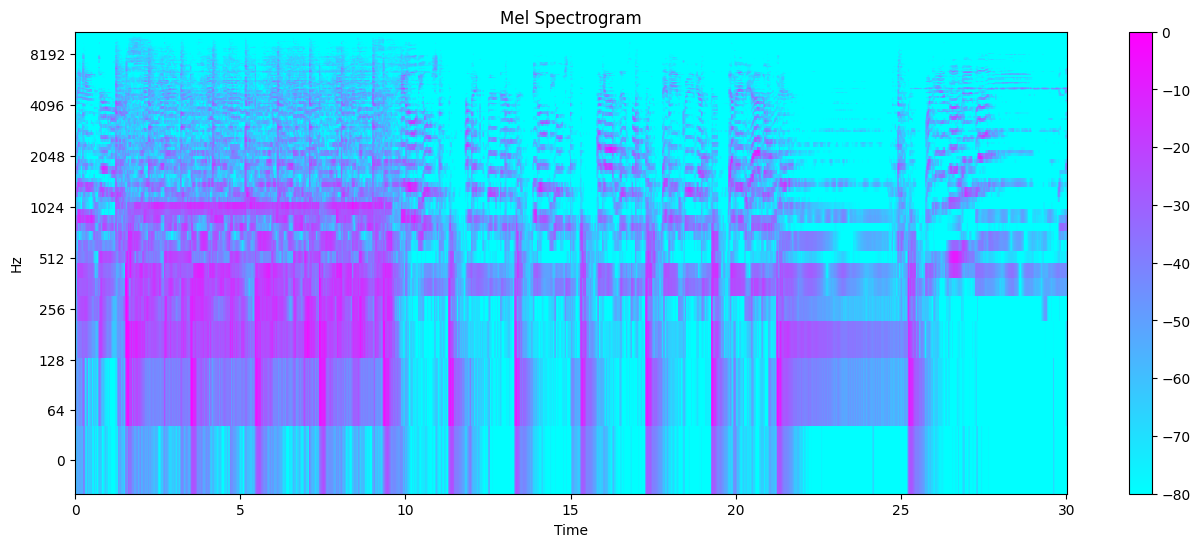

In [12]:
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()


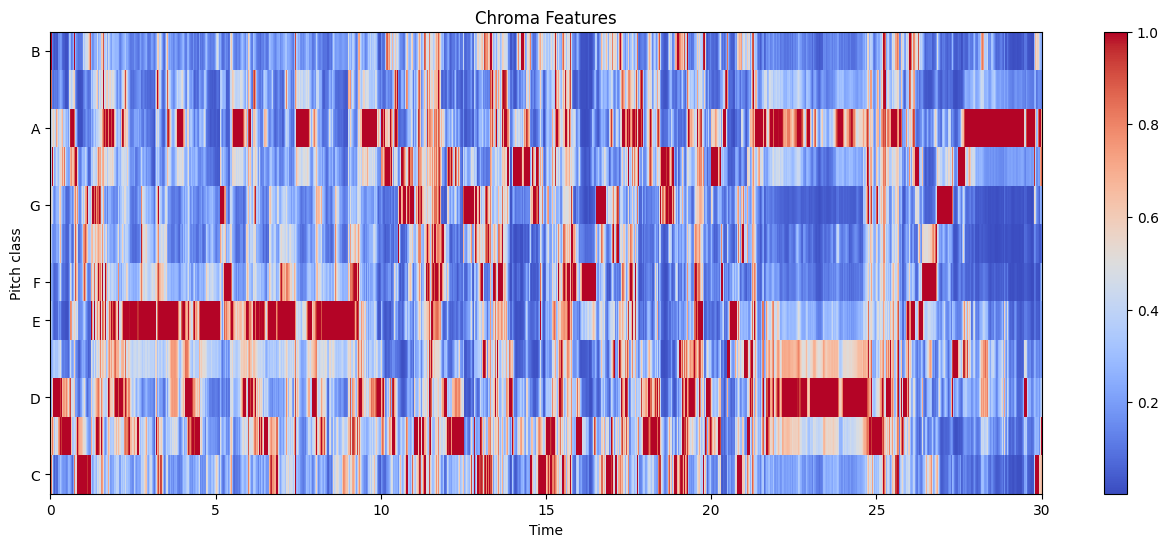

In [13]:
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

In [14]:
df= pd.read_csv('..\Data\\features_30_sec.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_14468\2766890017.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


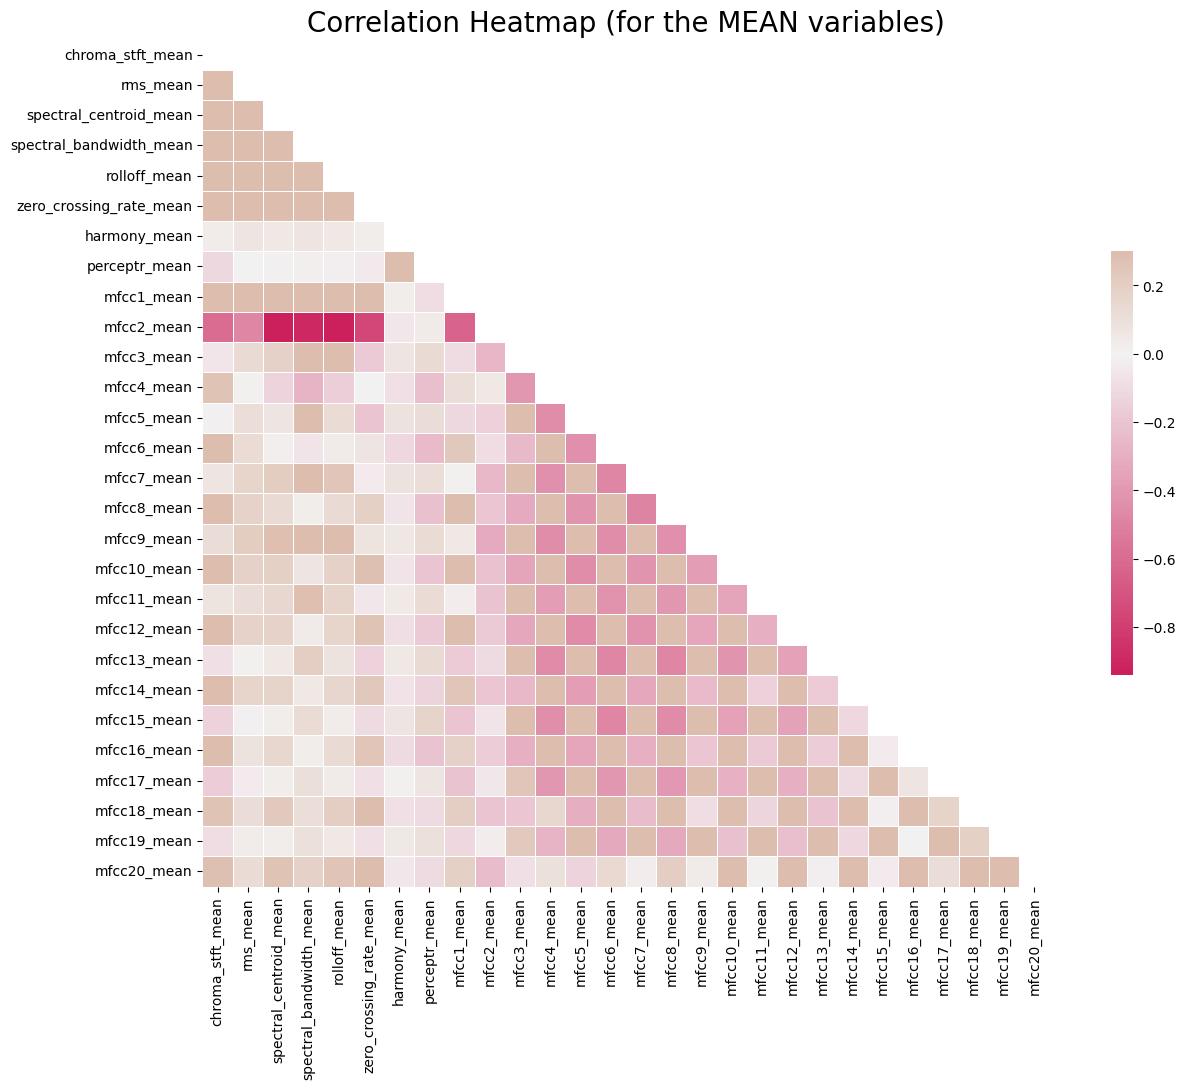

In [15]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

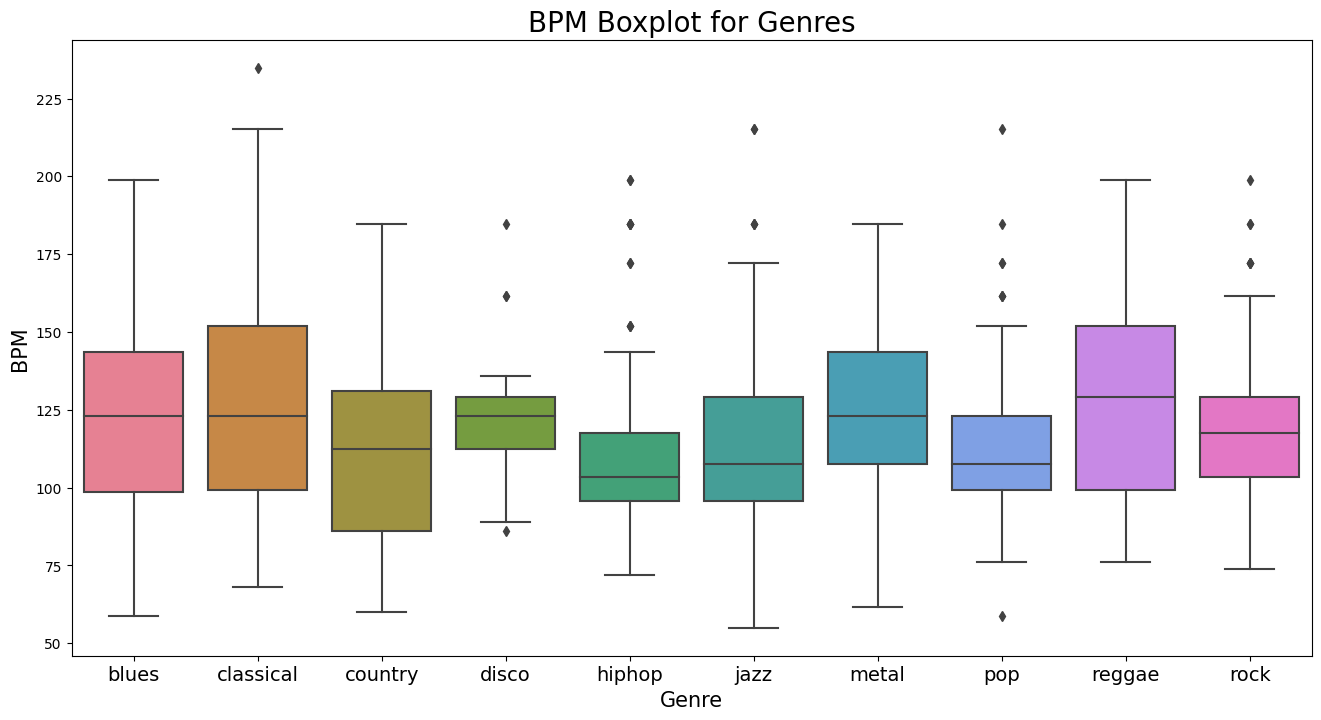

In [16]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

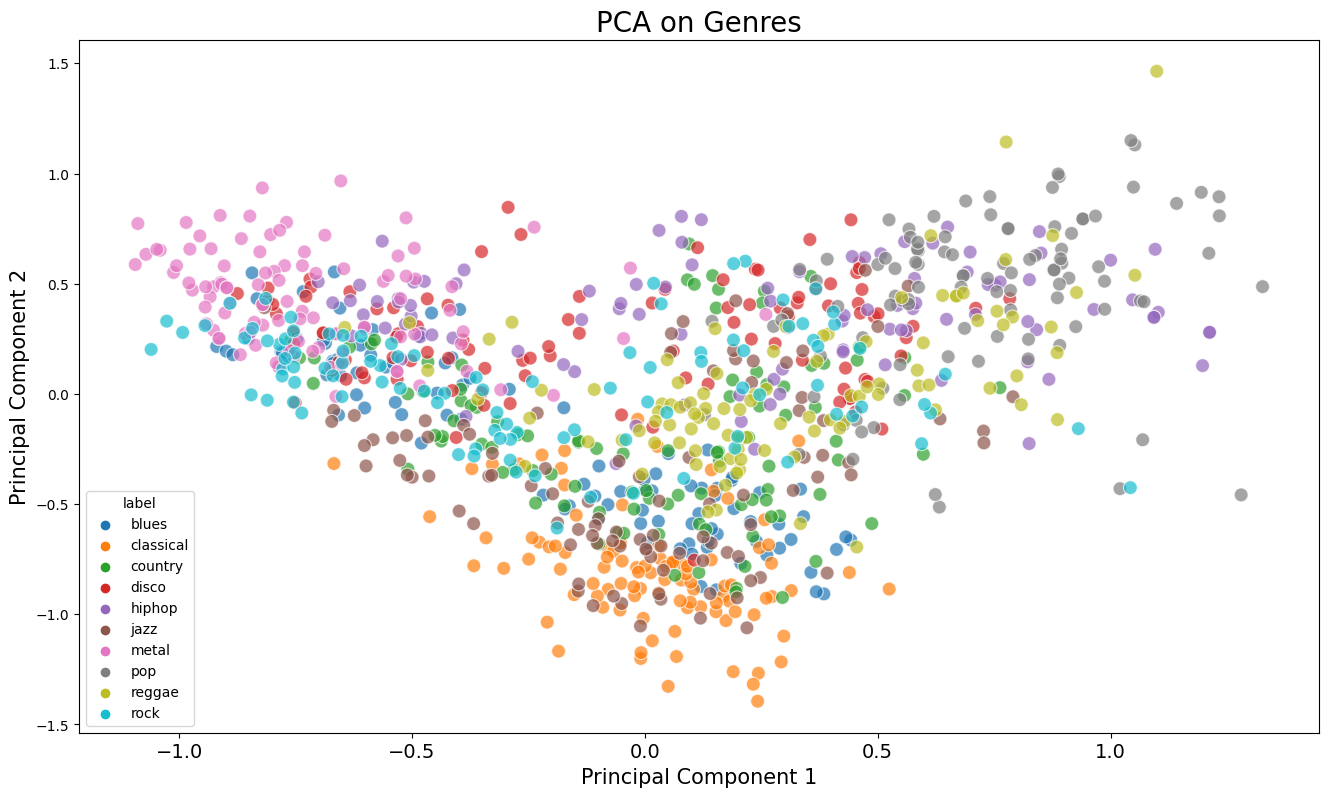

In [18]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")
